# ABOUT THE PROJECT:
__In the dynamic landscape of the automotive industry, the ability to accurately predict car prices has become paramount for both consumers and sellers. This Python-based project endeavors to develop a robust and effective car price prediction model, leveraging machine learning algorithms and data analysis techniques. The project centers around a dataset containing comprehensive information about various car models, encompassing features such as the year of manufacture, kilometers driven, fuel type, and more. Through the utilization of powerful Python libraries and tools, the project aims to unravel patterns, relationships, and key factors influencing car prices.__

__The process begins with Exploratory Data Analysis (EDA), where insights are gleaned from the dataset to understand the distribution of features and their impact on pricing. Subsequently, a machine learning model is trained using supervised learning techniques, harnessing algorithms like regression to create a predictive model capable of estimating car prices accurately. The project aspires not only to deliver an effective prediction tool but also to contribute to the wider discourse on the factors influencing car pricing dynamics in the contemporary automotive market. As the project unfolds, it underscores the invaluable role that Python and machine learning play in deciphering complex datasets and offering actionable insights for stakeholders in the automotive domain.__

# ABOUT THE DATASET USED:
__This dataset on cars serves as a rich repository of diverse and comprehensive information, offering a holistic perspective on various automotive models. Collected from reliable sources, the dataset encompasses a wide array of features, including but not limited to the year of manufacture, brand, model, fuel type, transmission, mileage, engine capacity, and price. With entries spanning different years, manufacturers, and market segments, the dataset provides an invaluable resource for researchers, analysts, and enthusiasts seeking to explore and understand the intricate nuances of the automotive landscape.__

__This dataset's potential applications are manifold, ranging from market trend analysis and predictive modeling to decision-making support for both consumers and industry stakeholders. Rigorous data cleaning and preprocessing techniques have been applied to ensure data quality, making it suitable for various analytical methodologies. The dataset not only serves as a quantitative source for statistical analysis but also holds the qualitative essence of the automotive domain, reflecting the evolving preferences, technological advancements, and market dynamics over time.__

THERE ARE A TOTAL OF 2840 rows and 6 columns in this data set

## COLUMNS
- __NAME__-Name of the car model and brand.
- __YEAR__-Year the car was manufactured.
- __MILES__-Distance covered by the car.
- __COLOR__-Color of the car.
- __CONDITION__-Condition of the car.
- __PRICE__-Price of the car.

### IMPORTING ALL THE NECESSARY LIBRARIES

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [128]:
df = pd.read_csv('car_web_scraped_dataset.csv')
df

,name,year,miles,color,condition,price
0,Kia Forte,2022,"41,406 miles","Gray exterior, Black interior","No accidents reported, 1 Owner","$15,988"
1,Chevrolet Silverado 1500,2021,"15,138 miles","White exterior, Black interior","1 accident reported, 1 Owner","$38,008"
2,Toyota RAV4,2022,"32,879 miles","Silver exterior, Unknown interior","No accidents reported, 1 Owner","$24,988"
3,Honda Civic,2020,"37,190 miles","Blue exterior, Black interior","No accidents reported, 1 Owner","$18,998"
4,Honda Civic,2020,"27,496 miles","Black exterior, Black interior","No accidents reported, 1 Owner","$19,498"
...,...,...,...,...,...,...
2835,Ford Escape,2013,"98,601 miles","Silver exterior, Unknown interior","2 accidents reported, 3 Owners","$8,995"
2836,Mercedes-Benz R-Class,2009,"120,694 miles","Black exterior, Black interior","1 accident reported, 3 Owners","$9,495"
2837,Mercedes-Benz GLC,2022,"27,894 miles","Gray exterior, Gray interior","No accidents reported, 2 Owners","$29,999"
2838,Honda CR-V,2021,"50,220 miles","Gray exterior, Unknown interior","No accidents reported, 1 Owner","$22,992"


### WEB SCRAPING & DATA CLEANING

In [36]:
df = df.drop_duplicates()

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2312 entries, 0 to 2839
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       2312 non-null   object
 1   year       2312 non-null   int64 
 2   miles      2312 non-null   object
 3   color      2312 non-null   object
 4   condition  2312 non-null   object
 5   price      2312 non-null   object
dtypes: int64(1), object(5)
memory usage: 126.4+ KB


In [38]:
df.isnull().sum()

name         0
year         0
miles        0
color        0
condition    0
price        0
dtype: int64

In [39]:
df['name']=df['name'].str.lower()
df['brand'] = df['name']
df['name'].unique()

array(['kia forte', 'chevrolet silverado 1500', 'toyota rav4',
       'honda civic', 'honda accord', 'mercedes-benz glc', 'bmw 5 series',
       'jeep wrangler', 'porsche macan', 'buick cascada', 'bmw 3 series',
       'jeep grand cherokee', 'mercedes-benz c-class', 'porsche cayenne',
       'honda odyssey', 'bmw 7 series', 'kia k5', 'nissan kicks',
       'honda cr-v', 'chrysler pacifica', 'volkswagen tiguan',
       'nissan sentra', 'toyota camry', 'chevrolet malibu',
       'chevrolet volt', 'land rover range rover sport',
       'toyota highlander', 'kia optima', 'dodge charger',
       'toyota corolla', 'toyota tacoma', 'toyota 4runner',
       'ford mustang', 'ford f-150', 'honda pilot', 'nissan rogue sport',
       'infiniti qx60', 'volvo xc60', 'ford explorer',
       'chevrolet equinox', 'mercedes-benz gle', 'mercedes-benz s-class',
       'volvo s90', 'bmw x3', 'mercedes-benz gls', 'ford bronco sport',
       'mitsubishi outlander sport', 'volvo xc90', 'lexus rx',
       'mer

In [40]:
names = df['brand'].str.split().str[0].tolist()
un = list(set(names))  
horizontal = """','""".join(un)
horizontal

"honda','chrysler','fiat','volkswagen','volvo','land','ram','acura','jeep','gmc','karma','mitsubishi','dodge','mclaren','lincoln','buick','subaru','porsche','ford','mini','aston','bentley','cadillac','mercedes-benz','jaguar','saturn','lexus','genesis','hyundai','maserati','audi','alfa','chevrolet','rolls-royce','bmw','nissan','mazda','pontiac','kia','toyota','scion','infiniti"

In [59]:
oldname=['ram','bmw','hyundai','lincoln','jeep','mazda','cadillac','kia','toyota','mitsubishi','volkswagen','lexus','aston','dodge','saturn','land','buick','chevrolet','honda','mini','pontiac','jaguar','bentley','infiniti','acura','alfa','audi','gmc','genesis','karma','mclaren','ford','fiat','volvo','scion','rolls-royce','chrysler','mercedes','nissan','porsche','maserati','subaru']                                                              
newname= ['ram','bmw','hyundai','lincoln','jeep','mazda','cadillac','kia','toyota','mitsubishi','volkswagen','lexus','aston martin','dodge','saturn','land','buick','chevrolet','honda','mini','pontiac','jaguar','bentley','infiniti','acura','alfa','audi','gmc','genesis','karma','mclaren','ford','fiat','volvo','scion','rolls-royce','chrysler','mercedes','nissan','porsche','maserati','subaru']  
for old,new in zip(oldname,newname):
    df['brand'] = np.where(df['brand'].str.contains(old),new,df['brand'])
    
df['brand'].unique()    

array(['kia', 'chevrolet', 'toyota', 'honda', 'mercedes', 'bmw', 'jeep',
       'porsche', 'buick', 'nissan', 'chrysler', 'volkswagen', 'land',
       'dodge', 'ford', 'infiniti', 'volvo', 'mitsubishi', 'lexus',
       'hyundai', 'mazda', 'acura', 'maserati', 'subaru', 'audi',
       'jaguar', 'gmc', 'cadillac', 'ram', 'alfa', 'fiat', 'lincoln',
       'aston martin', 'mini', 'genesis', 'karma', 'scion', 'mclaren',
       'rolls-royce', 'bentley', 'pontiac', 'saturn'], dtype=object)

In [41]:
df['year'].info()

<class 'pandas.core.series.Series'>
Int64Index: 2312 entries, 0 to 2839
Series name: year
Non-Null Count  Dtype
--------------  -----
2312 non-null   int64
dtypes: int64(1)
memory usage: 36.1 KB


In [42]:
df['miles'] = df['miles'].str.strip('miles').str.replace(',','')
df['miles'] = df['miles'].astype(int)

In [43]:
df['miles']

0        41406
1        15138
2        32879
3        37190
4        27496
         ...  
2835     98601
2836    120694
2837     27894
2838     50220
2839     26510
Name: miles, Length: 2312, dtype: int64

In [44]:
df['exterior'] = df['color'].str.extract(r'(\D+),')[0].astype(object)
df['interior'] = df['color'].str.extract(r',(\D+)')[0].astype(object)
df['exterior'] = df['exterior'].str.strip('exterior').str.replace(' ','')
df['interior'] = df['interior'].str.strip('interior').str.replace(' ','')
df = df.drop(columns=['color'])

In [45]:
df['accidents'] = df['condition'].str.extract(r'(\d+)\s*accident').replace(np.nan,0).astype(int)
df['past_owners'] = df['condition'].str.extract(r'reported,\s*(\d+)').astype(int)
df = df.drop(columns=['condition'])


In [46]:
df['price']=df['price'].str.strip('$').str.replace(',','').astype(int)


In [47]:
df['interior'] = df['interior'].replace('Unknown',np.nan)
df['exterior'] = df['exterior'].replace('Unknown',np.nan)

In [48]:
df

,name,year,miles,price,brand,exterior,interior,accidents,past_owners
0,kia forte,2022,41406,15988,kia forte,Gray,Black,0,1
1,chevrolet silverado 1500,2021,15138,38008,chevrolet silverado 1500,White,Black,1,1
2,toyota rav4,2022,32879,24988,toyota rav4,Silver,NaN,0,1
3,honda civic,2020,37190,18998,honda civic,Blue,Black,0,1
4,honda civic,2020,27496,19498,honda civic,Black,Black,0,1
...,...,...,...,...,...,...,...,...,...
2835,ford escape,2013,98601,8995,ford escape,Silver,NaN,2,3
2836,mercedes-benz r-class,2009,120694,9495,mercedes-benz r-class,Black,Black,1,3
2837,mercedes-benz glc,2022,27894,29999,mercedes-benz glc,Gray,Gray,0,2
2838,honda cr-v,2021,50220,22992,honda cr-v,Gray,NaN,0,1


# EXPLORATORY DATA ANALYSIS

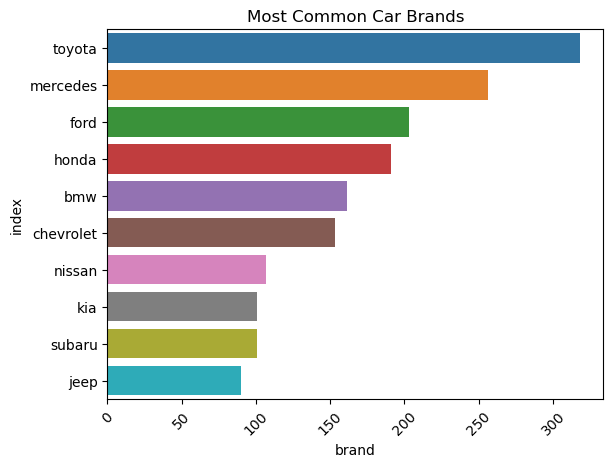

In [68]:
a = df['brand'].value_counts().head(10).reset_index()
a
sns.barplot(data = a, x= 'brand', y= 'index')
plt.title('Most Common Car Brands')
plt.xticks(rotation = 45);

### UNIVARIATED ANALYSIS

Text(0.5, 1.0, 'distribution of cars by years')

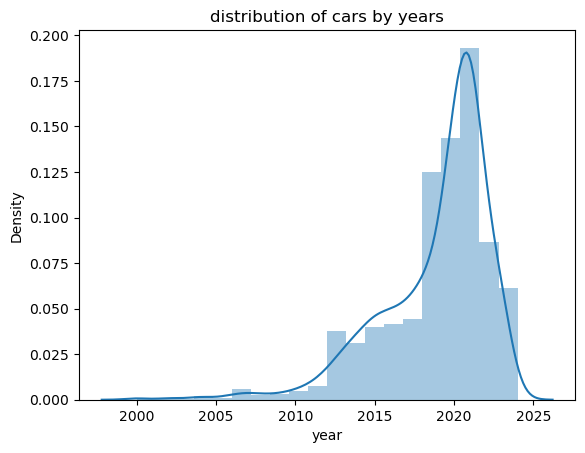

In [80]:
sns.distplot(df['year'],bins=20)
plt.title('distribution of cars by years')

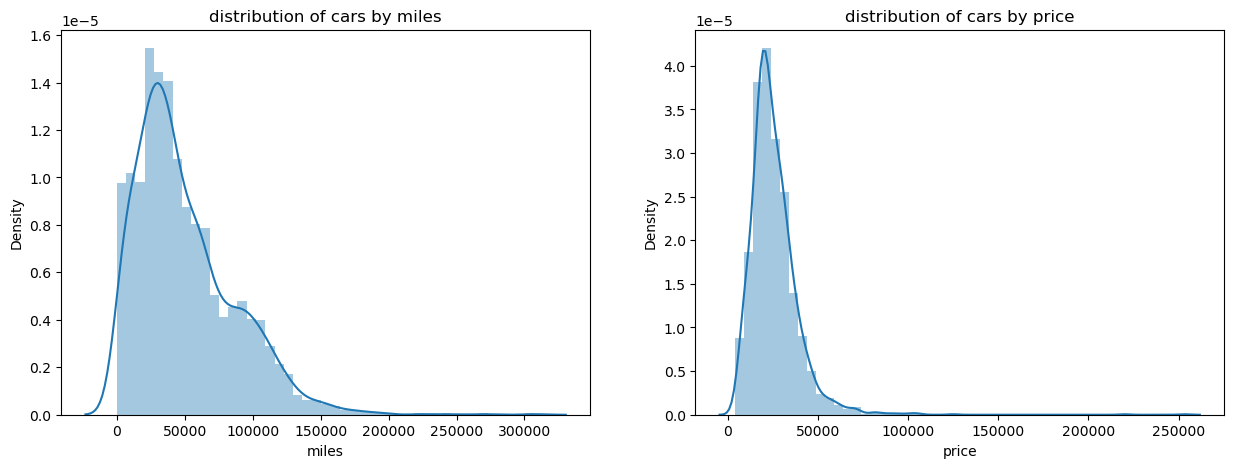

In [82]:
d = ['miles','price']
plt.figure(figsize=(15,5))
for i,col in enumerate(d):
    plt.subplot(1,2,i+1)
    sns.distplot(df[col])
    plt.title(f'distribution of cars by {col}')

### REMOVING OUTLIERS

In [83]:
df[d].skew()

miles    1.212093
price    4.334706
dtype: float64

In [86]:
upper1 = df['miles'].quantile(0.999)
lower1 = df['miles'].quantile(0.001)
df[df['miles']>=upper1].count()
df[df['miles']<=lower1].count()
upper = df['price'].quantile(0.999)
lower = df['price'].quantile(0.001)
df = df[(df['price']>=lower) & (df['price']<=upper) & (df['name']!='karma') & (df['miles']<=upper1) & (df['miles']>=lower1)] 
df

,name,year,miles,price,brand,exterior,interior,accidents,past_owners
0,kia forte,2022,41406,15988,kia,Gray,Black,0,1
1,chevrolet silverado 1500,2021,15138,38008,chevrolet,White,Black,1,1
2,toyota rav4,2022,32879,24988,toyota,Silver,NaN,0,1
3,honda civic,2020,37190,18998,honda,Blue,Black,0,1
4,honda civic,2020,27496,19498,honda,Black,Black,0,1
...,...,...,...,...,...,...,...,...,...
2835,ford escape,2013,98601,8995,ford,Silver,NaN,2,3
2836,mercedes-benz r-class,2009,120694,9495,mercedes,Black,Black,1,3
2837,mercedes-benz glc,2022,27894,29999,mercedes,Gray,Gray,0,2
2838,honda cr-v,2021,50220,22992,honda,Gray,NaN,0,1


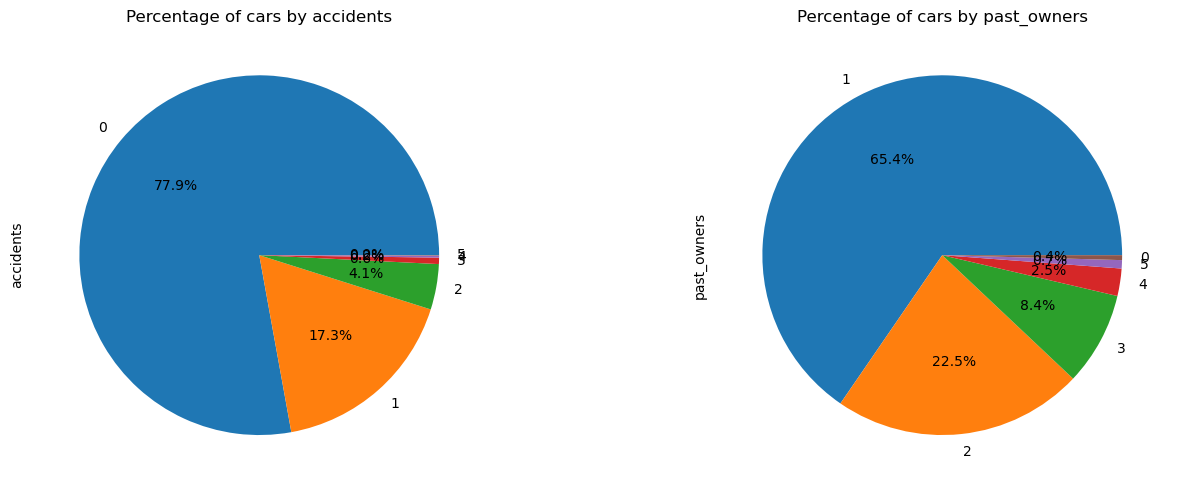

In [88]:
e = ['accidents','past_owners']
plt.figure(figsize=(15,5))
for i,col in enumerate(e):
    plt.subplot(1,2,i+1)
    df[col].value_counts().plot.pie(autopct='%.1f%%')
    plt.title(f'Percentage of cars by {col}')
plt.tight_layout()     

### BIVARIATED ANALYSIS

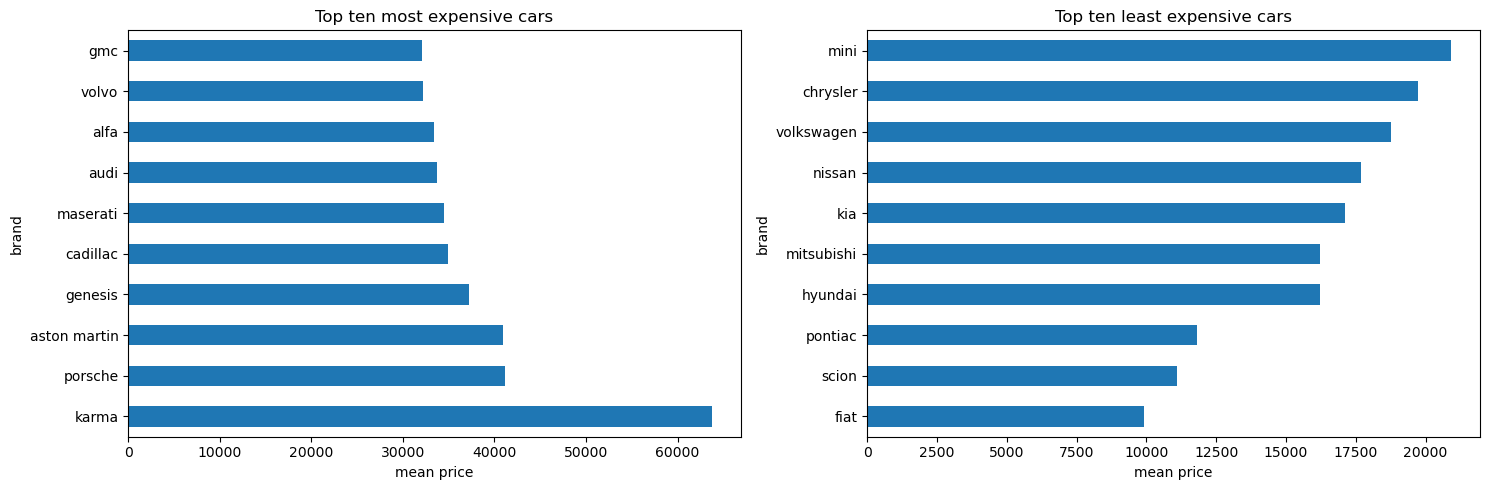

In [89]:
f = df.groupby('brand')['price'].mean().sort_values(ascending=False).head(10)
g= df.groupby('brand')['price'].mean().sort_values(ascending=True).head(10)

fig, (a,b) = plt.subplots(1,2,figsize=(15,5))

f.plot(kind='barh',ax=a)
g.plot(kind='barh',ax=b)
a.set_title('Top ten most expensive cars')
b.set_title('Top ten least expensive cars')
a.set_xlabel('mean price')
b.set_xlabel('mean price')

plt.tight_layout()

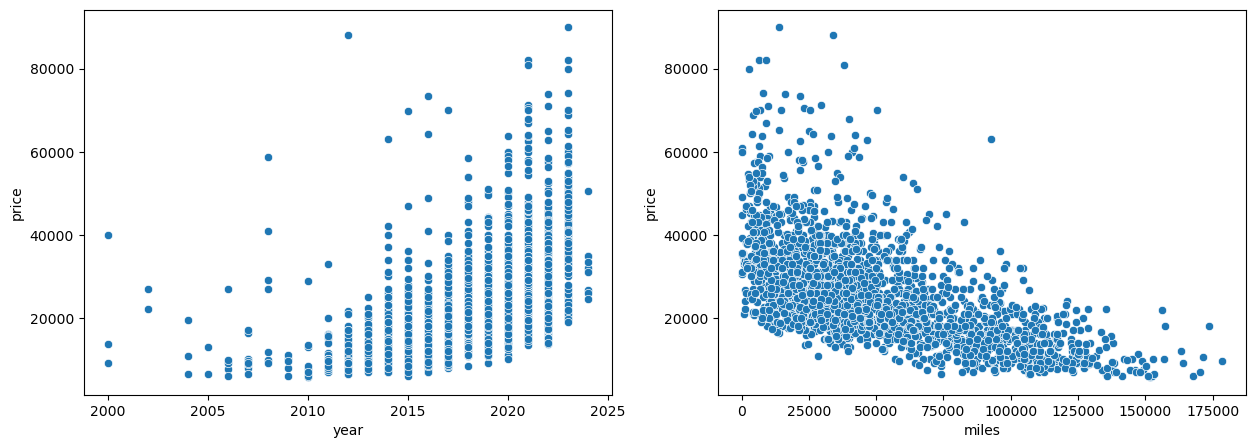

In [91]:
h =['year','miles']
plt.figure(figsize=(15,5))
for i,col in enumerate(h):
    plt.subplot(1,2,i+1)
    sns.scatterplot(x=df[col],y=df['price'])

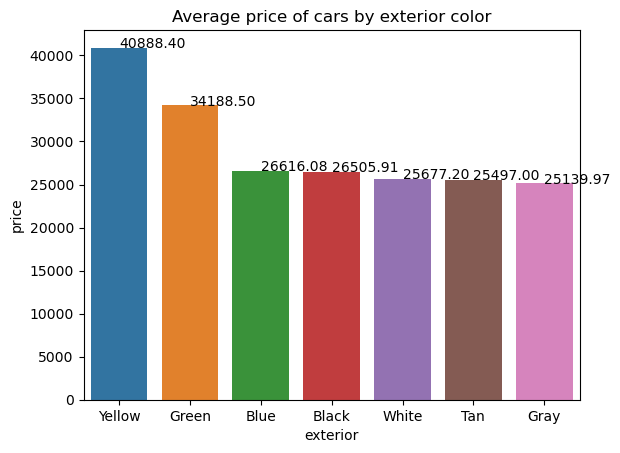

In [92]:
i = df.groupby('exterior')['price'].mean().sort_values(ascending=False).head(7).reset_index()               
sns.barplot(data=i,x=i['exterior'],y=i['price'])
plt.title('Average price of cars by exterior color')
for i,data in enumerate(i['price']):
    plt.text(i,data,s= f'{data:.2f}')
    

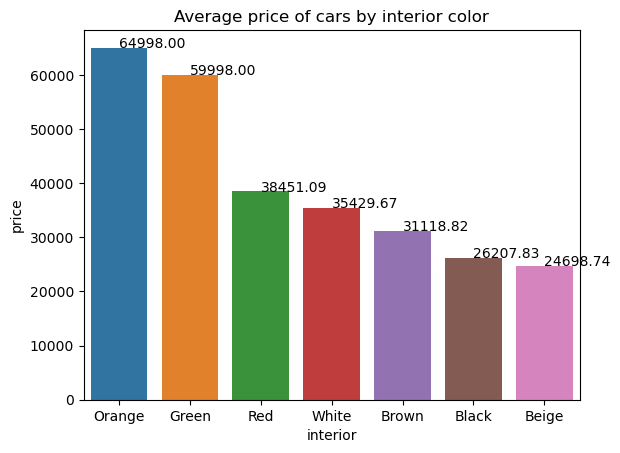

In [93]:
j = df.groupby('interior')['price'].mean().sort_values(ascending=False).head(7).reset_index()    
sns.barplot(data=j,x=j['interior'],y=j['price'])
plt.title('Average price of cars by interior color')

for i,data in enumerate(j['price']):
    plt.text(i,data,s= f'{data:.2f}')


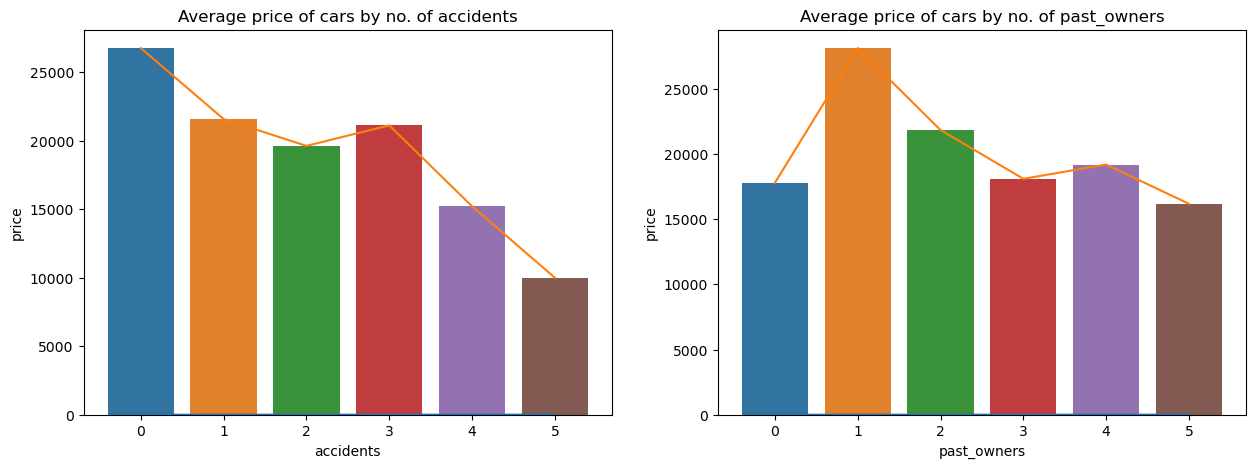

In [94]:
k =['accidents','past_owners']
plt.figure(figsize=(15,5))
for i,col in enumerate(k):
    plt.subplot(1,2,i+1)
    k= df.groupby(col)['price'].mean().reset_index()
    sns.barplot(data = k,x=k[col],y=k['price'])
    plt.title(f'Average price of cars by no. of {col}')
    plt.plot(k)


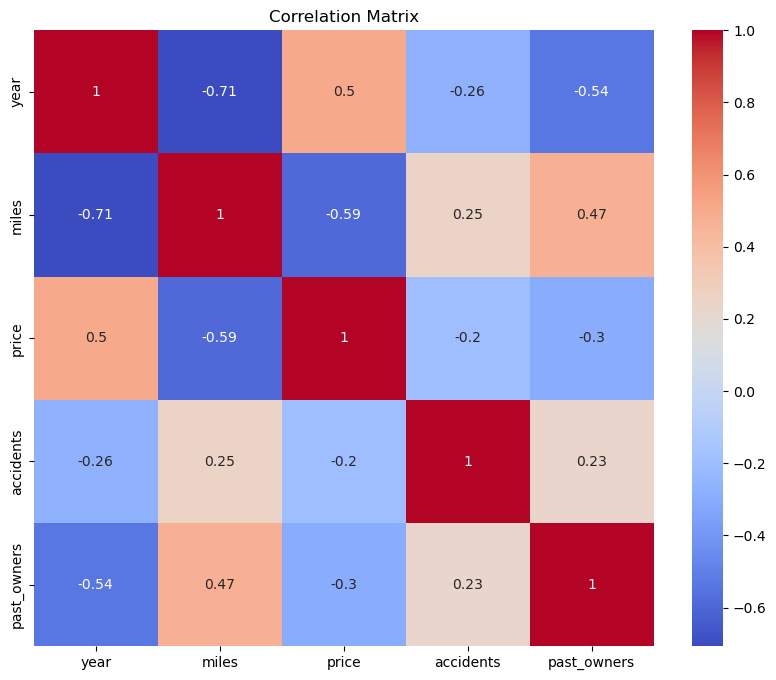

,year,miles,price,accidents,past_owners
year,1.000000,-0.707437,0.500767,-0.262350,-0.537298
miles,-0.707437,1.000000,-0.587590,0.247259,0.468001
price,0.500767,-0.587590,1.000000,-0.197539,-0.296530
accidents,-0.262350,0.247259,-0.197539,1.000000,0.232506
past_owners,-0.537298,0.468001,-0.296530,0.232506,1.000000


In [120]:
correlation_matrix=df.corr()
#print(correlation_matrix)
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
(correlation_matrix)


### ML MODEL BUILDING

In [95]:
dataset = df.copy()
dataset

,name,year,miles,price,brand,exterior,interior,accidents,past_owners
0,kia forte,2022,41406,15988,kia,Gray,Black,0,1
1,chevrolet silverado 1500,2021,15138,38008,chevrolet,White,Black,1,1
2,toyota rav4,2022,32879,24988,toyota,Silver,NaN,0,1
3,honda civic,2020,37190,18998,honda,Blue,Black,0,1
4,honda civic,2020,27496,19498,honda,Black,Black,0,1
...,...,...,...,...,...,...,...,...,...
2835,ford escape,2013,98601,8995,ford,Silver,NaN,2,3
2836,mercedes-benz r-class,2009,120694,9495,mercedes,Black,Black,1,3
2837,mercedes-benz glc,2022,27894,29999,mercedes,Gray,Gray,0,2
2838,honda cr-v,2021,50220,22992,honda,Gray,NaN,0,1


In [96]:
dataset.describe()

,year,miles,price,accidents,past_owners
count,2276.000000,2276.000000,2276.000000,2276.000000,2276.000000
mean,2018.925747,49216.534271,25515.097540,0.280756,1.492531
std,3.361740,34076.336147,11530.085237,0.589877,0.814936
min,2000.000000,63.000000,5680.000000,0.000000,0.000000
25%,2017.000000,23889.750000,17995.000000,0.000000,1.000000
50%,2020.000000,40703.000000,22999.000000,0.000000,1.000000
75%,2021.000000,68541.500000,30998.250000,0.000000,2.000000
max,2024.000000,178527.000000,89991.000000,5.000000,5.000000


### SPLITING DATA IN TRAINING AND TEST SET

In [97]:
X = dataset.drop(columns='price').values
y = np.log(dataset['price'])


In [99]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy = 'most_frequent')
imputer.fit(X[:,[4,5]])
X[:,[4,5]]=imputer.transform(X[:,[4,5]])
print(X)

[['kia forte' 2022 41406 ... 'Black' 0 1]
 ['chevrolet silverado 1500' 2021 15138 ... 'Black' 1 1]
 ['toyota rav4' 2022 32879 ... 'Black' 0 1]
 ...
 ['mercedes-benz glc' 2022 27894 ... 'Gray' 0 2]
 ['honda cr-v' 2021 50220 ... 'Black' 0 1]
 ['honda civic' 2021 26510 ... 'Black' 0 1]]


In [100]:
# TRAIN TEST SPLIT
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [101]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:,[1,2]] = sc.fit_transform(X_train[:,[1,2]])
X_test[:,[1,2]] = sc.fit_transform(X_test[:,[1,2]])


## PREDICTION MODEL BUILDING

In [109]:
#Importing libraries
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder 
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.pipeline import Pipeline 
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor 
from sklearn.svm import SVR

In [108]:
#Encoding Categorical Columns
s = ColumnTransformer(transformers=[
    ('encoder', OneHotEncoder(sparse=False, handle_unknown='ignore', drop='first'), [0, 3, 4,5])   
     ],remainder='passthrough')
s = ColumnTransformer(transformers=[
    ('encoder', OneHotEncoder(sparse=False, handle_unknown='ignore', drop='first'), [0, 3, 4,5])   
     ],remainder='passthrough')


In [110]:
# SVR Model
s1 = SVR(kernel='rbf')
pipe1 = Pipeline([('s',s),('s1',s1)])
pipe1.fit(X_train,y_train)
y_pred1 = pipe1.predict(X_test)
r1 = r2_score(y_test,y_pred1)
m1 = mean_absolute_error(y_test,y_pred1)

In [111]:
#Decision Tree Model
s2 = DecisionTreeRegressor(max_depth=15,random_state=42)
pipe2 = Pipeline([('s',s),('s2',s2)])
pipe2.fit(X_train,y_train)
y_pred2 = pipe2.predict(X_test)
r2 = r2_score(y_test,y_pred2)
m2 = mean_absolute_error(y_test,y_pred2)


In [114]:
#Gradient Boost Model
s5 =  GradientBoostingRegressor(n_estimators=500)

pipe5 = Pipeline([('s',s), ('s5',s5)])
pipe5.fit(X_train,y_train)

y_pred5 = pipe5.predict(X_test)

r5 = r2_score(y_test,y_pred5)
m5 = mean_absolute_error(y_test,y_pred5)


In [113]:
#Random Forest Model
S4 = RandomForestRegressor(n_estimators = 100,random_state = 5)
pipe4 = Pipeline([('s',s),('S4',S4)])
pipe4.fit(X_train,y_train)
y_pred4 = pipe4.predict(X_test)
r4 = r2_score(y_test,y_pred4)
m4 = mean_absolute_error(y_test,y_pred4)


### EXPORTING THE MODEL

In [121]:
import pickle
pickle.dump(dataset,open('df.pkl','wb'))
pickle.dump(pipe1,open('SVR.pkl','wb'))